In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from bs4 import BeautifulSoup 

In [3]:
#extracting from web and converting to data frame
req=requests.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm#")
soup=BeautifulSoup(req.content,"html.parser")
table = soup.find('table', {'class': 'table'})
rows = table.find_all('tr')
headers = [header.text.strip() for header in rows[0].find_all('th')]
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=headers)
print(df)

                                                Party   Won Leading Total
0                        Bharatiya Janata Party - BJP   240       0   240
1                      Indian National Congress - INC    99       0    99
2                                Samajwadi Party - SP    37       0    37
3                 All India Trinamool Congress - AITC    29       0    29
4                     Dravida Munnetra Kazhagam - DMK    22       0    22
5                                  Telugu Desam - TDP    16       0    16
6                        Janata Dal  (United) - JD(U)    12       0    12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT     9       0     9
8   Nationalist Congress Party – Sharadchandra Paw...     8       0     8
9                                     Shiv Sena - SHS     7       0     7
10             Lok Janshakti Party(Ram Vilas) - LJPRV     5       0     5
11      Yuvajana Sramika Rythu Congress Party - YSRCP     4       0     4
12                         Rashtriya J

In [4]:
df.dropna(inplace=True)

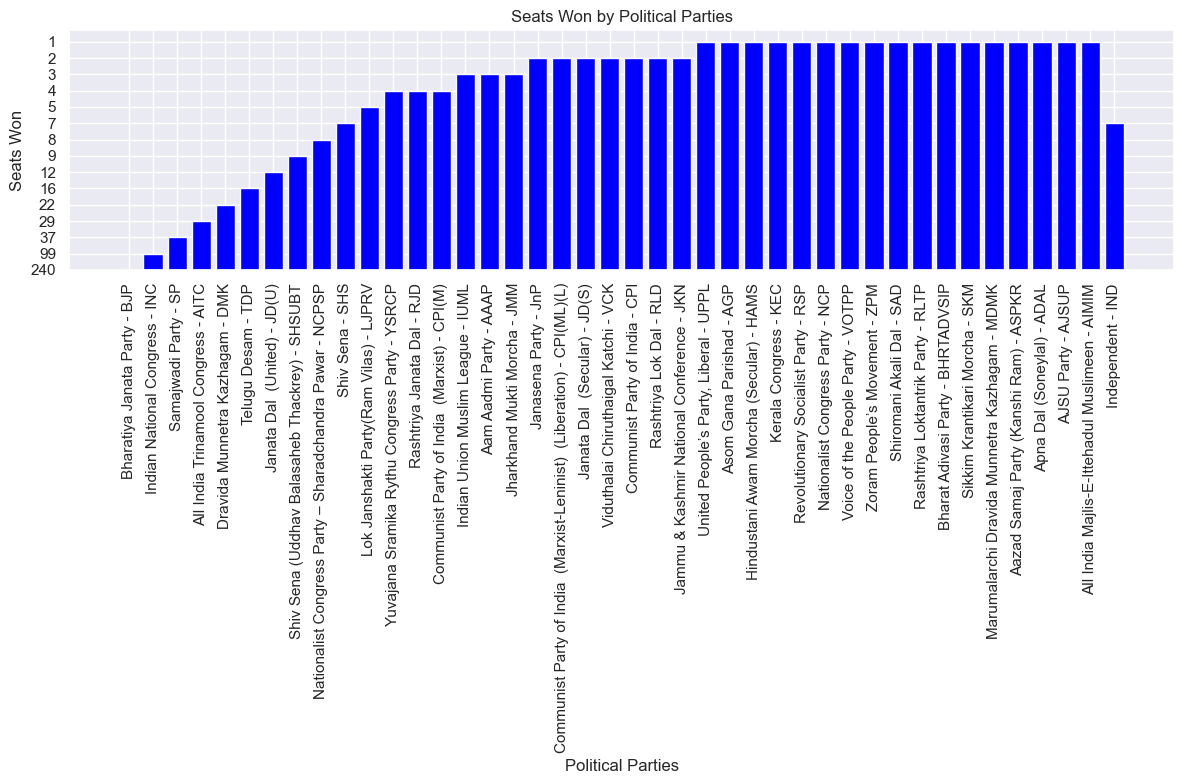

In [21]:
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Party'], df['Won'], color='blue')

# Adding labels and title
plt.xlabel('Political Parties')
plt.ylabel('Seats Won')
plt.title('Seats Won by Political Parties')

# Rotating labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()